In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
crash_data = pd.read_csv("crash_data.csv")
crash_data.head()

,year,fatal_killed,grevious_injured,minor_injured,without_injury
0,2012,25,130,178,150
1,2013,46,132,147,141
2,2014,71,151,144,123
3,2015,52,155,168,132
4,2016,63,178,151,171


In [16]:
crash_data.columns.to_list()

['year', 'fatal_killed', 'grevious_injured', 'minor_injured', 'without_injury']

In [17]:
crash_data.rename(columns = {
                     "fatal_killed":"Fatal",
                     "grevious_injured":"Greviously Injured",
                     "minor_injured": "Minor Injury",
                     "without_injury": "Without Injury"}, 
          inplace=True)

crash_data.head()

,year,Fatal,Greviously Injured,Minor Injury,Without Injury
0,2012,25,130,178,150
1,2013,46,132,147,141
2,2014,71,151,144,123
3,2015,52,155,168,132
4,2016,63,178,151,171


In [18]:
crash_data = pd.melt(crash_data, id_vars=['year'], value_vars=['Fatal',
                                          'Greviously Injured', 'Minor Injury',
                                          'Without Injury'])

crash_data.head(4)

,year,variable,value
0,2012,Fatal,25
1,2013,Fatal,46
2,2014,Fatal,71
3,2015,Fatal,52


In [19]:
crash_data.rename(columns = {"year":"Year",
                     "variable":"Crash Type",
                     "value":"Crash Count"}, 
          inplace=True) #supports inplace = True
crash_data.head()

,Year,Crash Type,Crash Count
0,2012,Fatal,25
1,2013,Fatal,46
2,2014,Fatal,71
3,2015,Fatal,52
4,2016,Fatal,63


Text(0.5, 1.05, 'Crash Trend (2012-2022)')

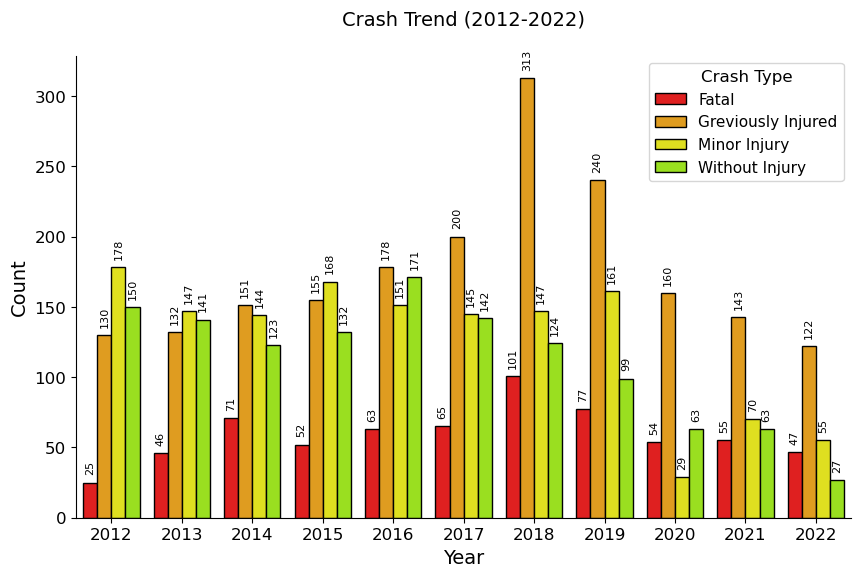

In [20]:
fig, ax = plt.subplots(figsize=(10, 6))

color = ["red", "orange", "yellow", "#a3ff00"]
# sns.set_palette(color)

sns.barplot(data = crash_data,
            x = "Year",
            y = "Crash Count",
            hue = "Crash Type",
            ax = ax,
            palette = sns.color_palette(color)
)

# Retrieve axis and fig objects from the current plot environment
# Adding bar labels

for p in ax.patches:
    p.set_edgecolor("black") # Add black border across all bars
    t = ax.annotate(str(np.int64(p.get_height())), xy = (p.get_x() + 0.03, p.get_height() + 7))
    t.set(size = 8, rotation=90)

# Remove spines
for s in ["top", "right"]:
    ax.spines[s].set_visible(False)

# Adding axes labels and tick parameters
ax.set_xlabel("Year", size = 14)
ax.set_ylabel("Count", size = 14)
ax.tick_params(labelsize = 12)

# Legend customisation
ax.legend(fontsize = 11,
          title = "Crash Type",
          title_fontsize = 12)

ax.set_title("Crash Trend (2012-2022)",
             fontsize = 14,
             y = 1.05)


In [21]:
fig.savefig('crash_plot.png', dpi = 300, bbox_inches = 'tight')